In [0]:
import pyspark
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("group10").setMaster("local")
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
from pyspark.sql.functions import explode
from pyspark.sql.functions import split

In [0]:
data_O = spark.read.load('/FileStore/tables/creditcard-1.csv', 
                         format='csv', 
                          header='true', 
                         inferSchema='true')
type(data_O)
pyspark.sql.dataframe.DataFrame

Out[37]: pyspark.sql.dataframe.DataFrame

In [0]:
classFreq = data_O.groupBy("Class").count()
classFreq.show()

+-----+------+
Class| count|
+-----+------+
 1| 492|
 0|284315|
+-----+------+

In [0]:
import pandas as pd
data= data_O.toPandas()
data= data.sample(frac=1)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 199725 to 67568
Data columns (total 31 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Time 284807 non-null float64
 1 V1 284807 non-null float64
 2 V2 284807 non-null float64
 3 V3 284807 non-null float64
 4 V4 284807 non-null float64
 5 V5 284807 non-null float64
 6 V6 284807 non-null float64
 7 V7 284807 non-null float64
 8 V8 284807 non-null float64
 9 V9 284807 non-null float64
 10 V10 284807 non-null float64
 11 V11 284807 non-null float64
 12 V12 284807 non-null float64
 13 V13 284807 non-null float64
 14 V14 284807 non-null float64
 15 V15 284807 non-null float64
 16 V16 284807 non-null float64
 17 V17 284807 non-null float64
 18 V18 284807 non-null float64
 19 V19 284807 non-null float64
 20 V20 284807 non-null float64
 21 V21 284807 non-null float64
 22 V22 284807 non-null float64
 23 V23 284807 non-null float64
 24 V24 284807 non-null float64
 25 V25 284807 non-null float64
 26 V26 284807 non-null float64
 27 V27 284807 non-null float64
 28 V28 284807 non-null float64
 29 Amount 284807 non-null float64
 30 Class 284807 non-null int32 
dtypes: float64(30), int32(1)
memory usage: 68.4 MB

In [0]:
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.shape

Out[41]: (984, 31)

Distribution of the Classes in the subsample dataset
1 0.5
0 0.5
Name: Class, dtype: float64

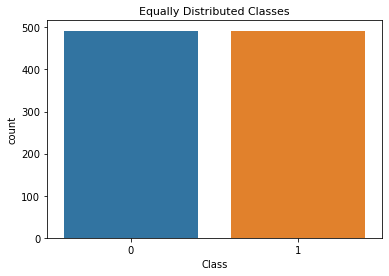

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=11)
plt.show()

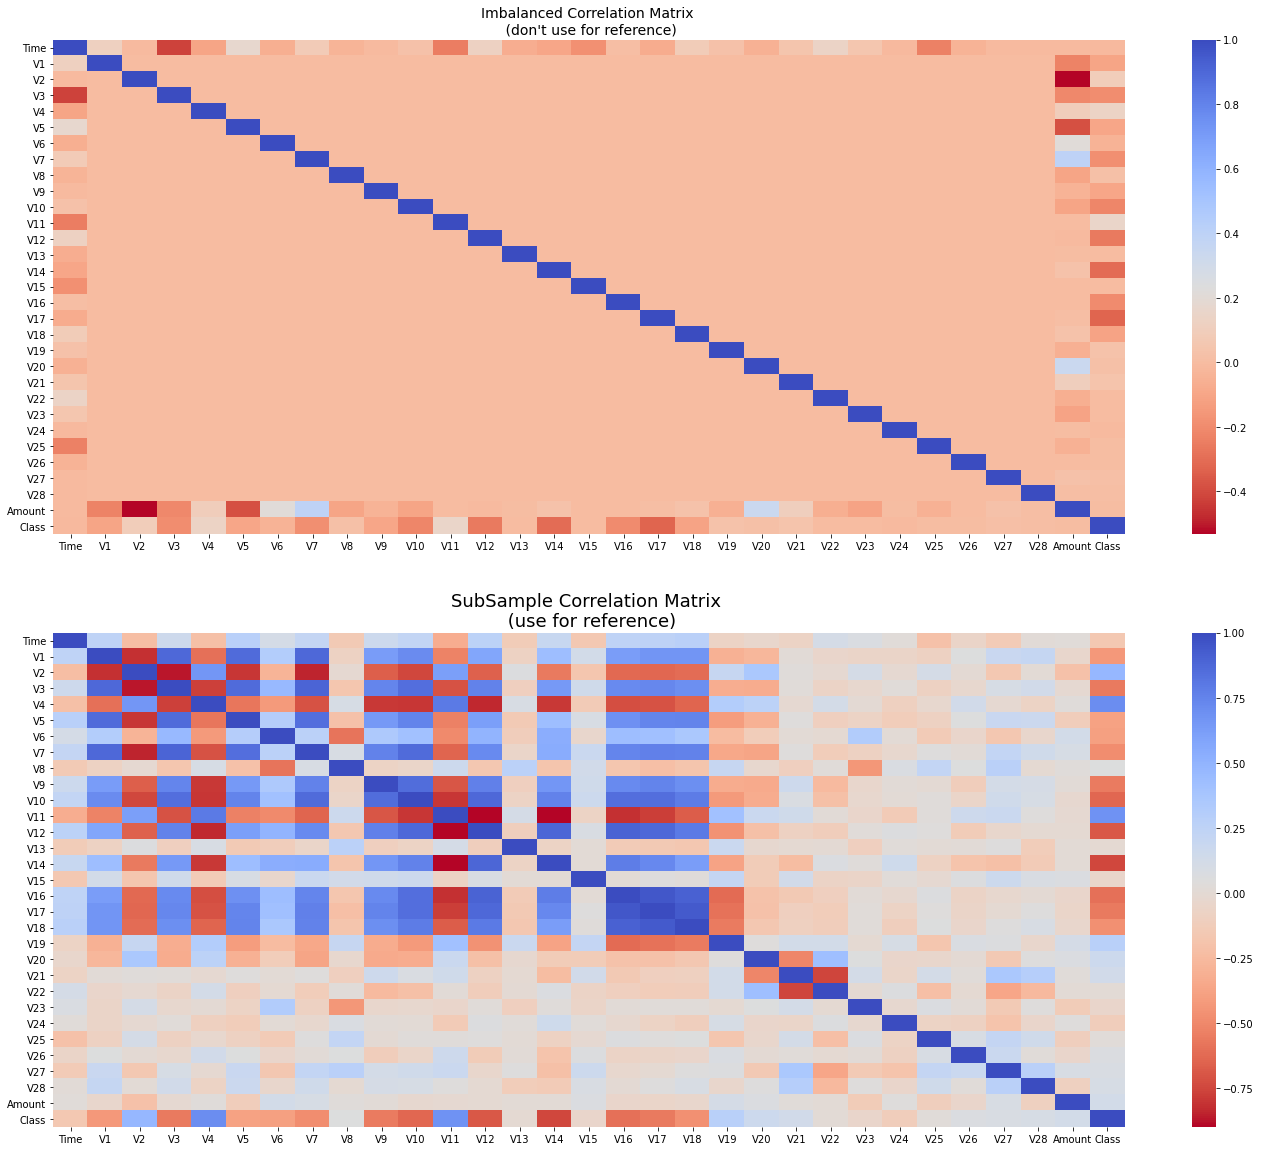

In [0]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':17}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=18)
plt.show()

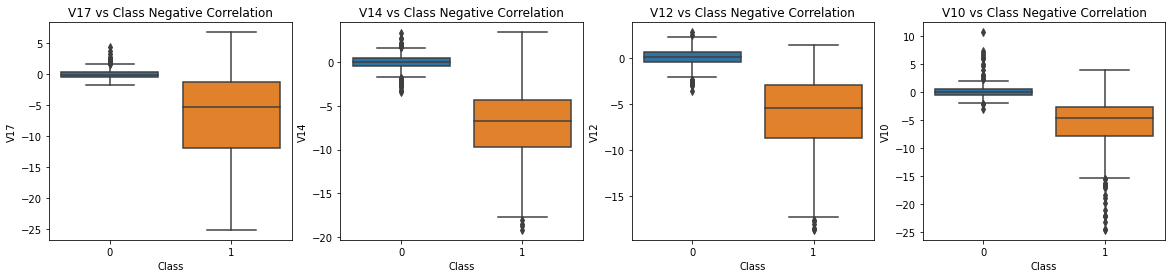

In [0]:
colors = ['PInk', 'Orange']
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V17", data=new_df,  ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=new_df,  ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

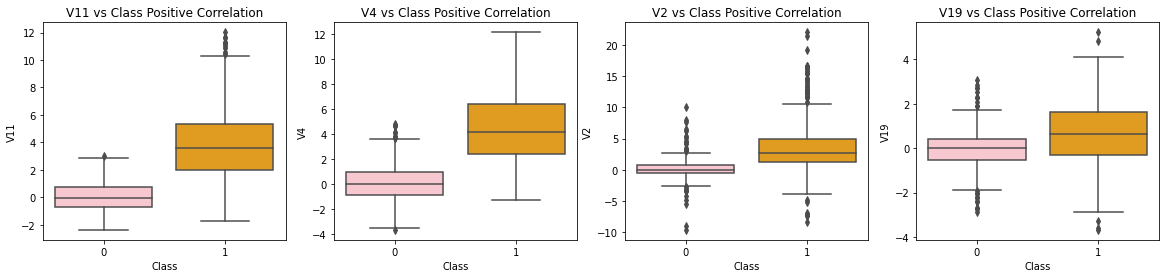

In [0]:

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

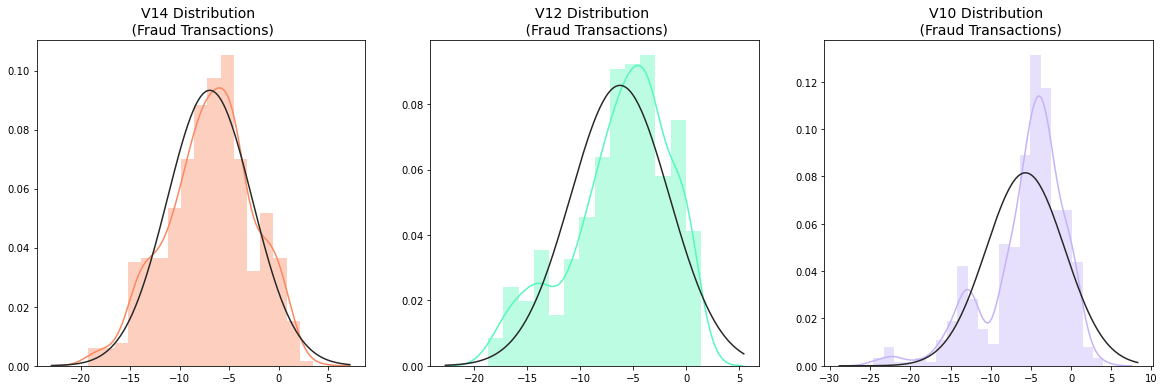

In [0]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)
plt.show()

In [0]:
import numpy as np


# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)


# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25


v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
plt.show()


type(new_df)

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.0475965708216, -18.6837146333443, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.7460441053944, -18.9132433348732, -22.1870885620007, -18.2711681738888, -15.1241628144947, -15.1237521803455, -15.5637913387301, -16.3035376590131, -24.4031849699728, -20.9491915543611, -22.1870885620007, -16.6011969664137, -16.2556117491401, -17.1415136412892, -14.9246547735487, -15.3460988468775, -16.6496281595399, -15.2399619587112, -15.5637913387301, -22.1870885620007, -14.9246547735487, -24.5882624372475, -22.1870885620007, -15.2318333653018, -19.836148851696, -23.2282548357516, -15.2399619587112]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 941
Out[47]: pandas.core.frame.DataFrame

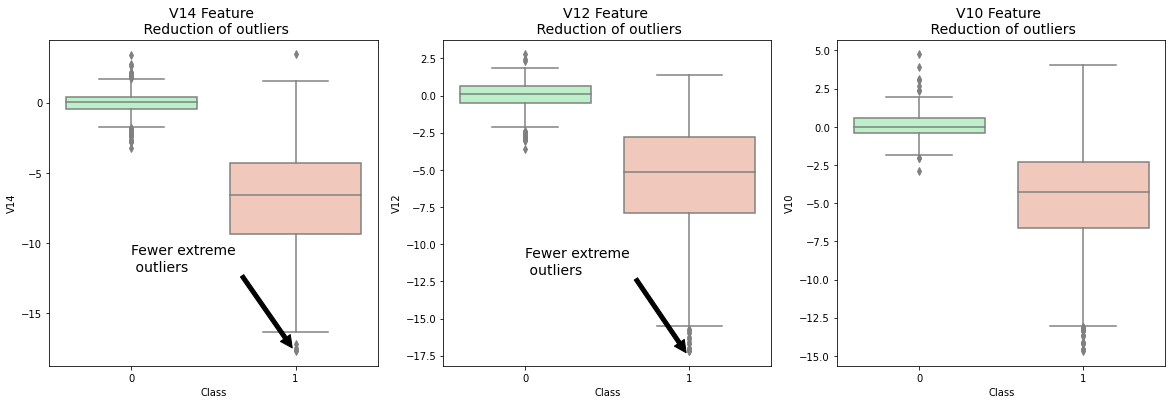

In [0]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [0]:
dfff = spark.createDataFrame(new_df)
from pyspark.sql.functions import *
from pyspark.sql.window import Window
win = Window().orderBy('Time')
dfff = dfff.withColumn("idx", row_number().over(win))

In [0]:

from pyspark.ml.feature import VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import DenseVector
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier

In [0]:
training_df = dfff.rdd.map(lambda x: (DenseVector(x[0:29]),x[30],x[31]))
training_df = spark.createDataFrame(training_df,["features","label","index"])
training_df.head()

Out[51]: Row(features=DenseVector([248.0, -0.2169, 0.9009, 1.5029, 0.8125, 0.194, -0.0315, 0.4908, 0.121, -0.9073, -0.1063, 1.7508, 1.1195, 0.5921, 0.3647, 0.6115, -0.3498, -0.1743, -0.0265, 0.2357, 0.0234, 0.1475, 0.4635, -0.0451, 0.2241, -0.2754, -0.4153, 0.1086, 0.053]), label=0, index=1)

In [0]:
training_df = training_df.select("index","features","label")
train_data, test_data = training_df.randomSplit([.8,.2],seed=1234)

In [0]:
train_data.groupBy("label").count().show()
test_data.groupBy("label").count().show()

+-----+-----+
label|count|
+-----+-----+
 0| 386|
 1| 364|
+-----+-----+

+-----+-----+
label|count|
+-----+-----+
 0| 98|
 1| 93|
+-----+-----+

In [0]:
#Random Forest
rf = RandomForestClassifier(labelCol="label", featuresCol="features") #training
rfModel = rf.fit(train_data)
rfPredictions = rfModel.transform(test_data) #testing the trained model
rfPredictions.printSchema()
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderPR")
rfScore = evaluator.evaluate(rfPredictions)
print("Score for Random Forest model = %g" % rfScore) #Evaluate model

root
-- index: long (nullable = true)
-- features: vector (nullable = true)
-- label: long (nullable = true)
-- rawPrediction: vector (nullable = true)
-- probability: vector (nullable = true)
-- prediction: double (nullable = false)

Score for Random Forest model = 0.983512

In [0]:
#CONFUSION MATRIX-RANDOM FOREST
tp = int(rfPredictions.filter("prediction == 1.0 AND label == 1").count())
fp = int(rfPredictions.filter("prediction == 1.0 AND label == 0").count())
tn = int(rfPredictions.filter("prediction == 0.0 AND label == 0").count())
fn = int(rfPredictions.filter("prediction == 0.0 AND label == 1").count())

print("true positives:", tp)
print("false positives:", fp)
print("true negatives:", tn)
print("false negatives:", fn)
print("Recall: ",tp/(tp+fn))
print("Precision: ", tp/(tp+fp))



true positives: 82
false positives: 1
true negatives: 97
false negatives: 11
Recall: 0.8817204301075269
Precision: 0.9879518072289156

In [0]:
#training
lr = LogisticRegression(labelCol="label", featuresCol="features")
lrModel = lr.fit(train_data)
#testing
lrPredictions = lrModel.transform(test_data)
#evaluating
lrScore = evaluator.evaluate(lrPredictions)
print("Score for logistic regression model = %g" % lrScore)


Score for logistic regression model = 0.977986

In [0]:
tp = int(lrPredictions.filter("prediction == 1.0 AND label == 1").count())
fp = int(lrPredictions.filter("prediction == 1.0 AND label == 0").count())
tn = int(lrPredictions.filter("prediction == 0.0 AND label == 0").count())
fn = int(lrPredictions.filter("prediction == 0.0 AND label == 1").count())
print("true positives:", tp)
print("false positives:", fp)
print("true negatives:", tn)
print("false negatives:", fn)
print("Recall: ",tp/(tp+fn))
print("Precision: ", tp/(tp+fp))



true positives: 83
false positives: 2
true negatives: 96
false negatives: 10
Recall: 0.8924731182795699
Precision: 0.9764705882352941